# Assignment 1

## By Vinit Saah     WES-237A.     PID A59014368 

In [88]:
from pynq.overlays.base import BaseOverlay
import time
from datetime import datetime
base = BaseOverlay("base.bit")

### Use gpio.ipynb as starting point and add C++ function to reset all GPIO pins. PMODB selected 

In [89]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"
#include "timer.h"
#include "stdint.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Functiion to clear gpio pin 
void clear_gpio(unsigned int pin)
{
    write_gpio(pin, 0);
}

//Function to clear 1-7 gpio pin of pmodb
void clear_gpio_all(void)
{
    for(unsigned int i=0; i < 8; i++)
    {
        clear_gpio(i);
    }
}

void test_clear_gpio_all(void)
{
    clear_gpio_all();
    delay_ms(500);
    
    for(int i = 1; i < 4; i++)
    {
       write_gpio(i,1);
       delay_ms(1000);
       clear_gpio(i);
       delay_ms(1000);
    }

    for(int i = 1; i < 4; i++)
    {
        write_gpio(i,1);
        delay_ms(500);
    }
    
    clear_gpio_all();
}

#### Test code for clearing all gpio

In [15]:
test_clear_gpio_all()

In [90]:
import time
SUCCESS = 0
FAILURE = -1
cond = 200
#freqHz in Hz, duty_cycle in percentage, unsigned int pin
def emulate_pwm(freqHz, duty_cycle, gpio_pin):
    global cond
    if freqHz == 0 or duty_cycle < 1 or duty_cycle > 99 or gpio_pin < 0 or gpio_pin > 7:
        print("Invalid arguements")
        return FAILURE
    
    time_period = 1/freqHz
    ton = duty_cycle * time_period / 100
    toff = time_period - ton
    
    print("Time period =",time_period, "ton =",ton,"toff =",toff)
    
    while cond:
        write_gpio(gpio_pin, 1)
        time.sleep(ton)
        clear_gpio(gpio_pin)
        time.sleep(toff)
        #print(cond)
        cond -= 1
    print("End of PWM Emulation")
    return SUCCESS
        
        
    

In [91]:
clear_gpio_all() 

In [92]:
result = emulate_pwm(45,1,1)

Time period = 0.022222222222222223 ton = 0.00022222222222222223 toff = 0.022000000000000002
End of PWM Emulation


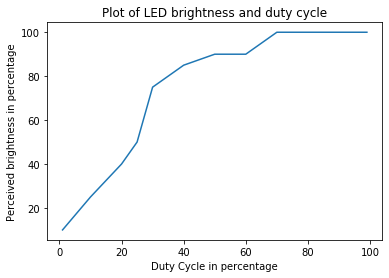

In [97]:
import matplotlib.pyplot as plt
import numpy as np

xDutyCycle = np.array([1, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 99])
yBrightness = np.array([10, 25, 40, 50, 75, 85, 90, 90, 100, 100, 100, 100, 100])

plt.plot(xDutyCycle, yBrightness)
plt.title("Plot of LED brightness and duty cycle")
plt.xlabel("Duty Cycle in percentage")
plt.ylabel("Perceived brightness in percentage")
plt.show()